1. (Πειραματικό Ερώτημα) Για τη συγκεκριμένη άσκηση θα χρησιμοποιήσουμε το dataset MNIST. Αποτελείται από 60.000 δείγματα στο training set και 10.000 δείγματα στο testing set. Περιέχει 10 διαφορετικές κλάσεις χειρόγραφων ψηφίων με διαστάσεις $1 \times 28 \times 28$. Αρχικά, επιλύστε το πρόβλημα της κεντρικοποιημένης μάθησης με την χρήση ενός κατάλληλου μοντέλου (π.χ. CNN, MLP). Δοκιμάστε για 2 διαφορετικές τιμές της κάθε παραμέτρου [batch size, learning rate], κρατώντας σταθερό το πλήθος των τοπικών επαναλήψεων [local epochs] και των ολικών επαναλήψεων [global iterations]. Τυπώστε την καμπύλη του training και testing loss, καθώς επίσης και την καμπύλη του testing accuracy.


===== Εκτέλεση Πειράματος #1: batch_size=32, lr=0.01 =====
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.59MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.41MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[batch_size=32, lr=0.01] Epoch [1/5], Train Loss: 0.1771, Test Loss: 0.0533, Test Accuracy: 98.51%
[batch_size=32, lr=0.01] Epoch [2/5], Train Loss: 0.0464, Test Loss: 0.0389, Test Accuracy: 98.64%
[batch_size=32, lr=0.01] Epoch [3/5], Train Loss: 0.0324, Test Loss: 0.0342, Test Accuracy: 98.74%
[batch_size=32, lr=0.01] Epoch [4/5], Train Loss: 0.0233, Test Loss: 0.0289, Test Accuracy: 99.01%
[batch_size=32, lr=0.01] Epoch [5/5], Train Loss: 0.0184, Test Loss: 0.0312, Test Accuracy: 99.04%

===== Εκτέλεση Πειράματος #2: batch_size=32, lr=0.001 =====
[batch_size=32, lr=0.001] Epoch [1/5], Train Loss: 0.4520, Test Loss: 0.1254, Test Accuracy: 96.17%
[batch_size=32, lr=0.001] Epoch [2/5], Train Loss: 0.1132, Test Loss: 0.0763, Test Accuracy: 97.54%
[batch_size=32, lr=0.001] Epoch [3/5], Train Loss: 0.0753, Test Loss: 0.0588, Test Accuracy: 98.09%
[batch_size=32, lr=0.001] Epoch [4/5], Train Loss: 0.0599, Test Loss:

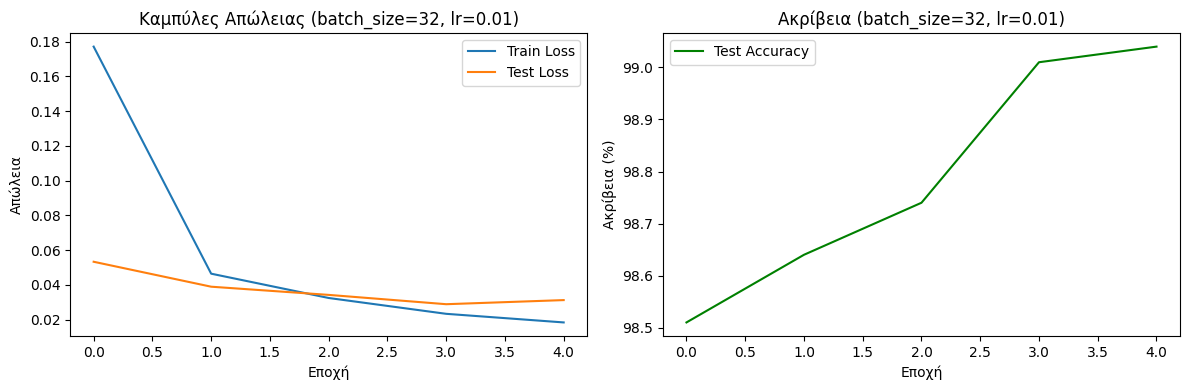

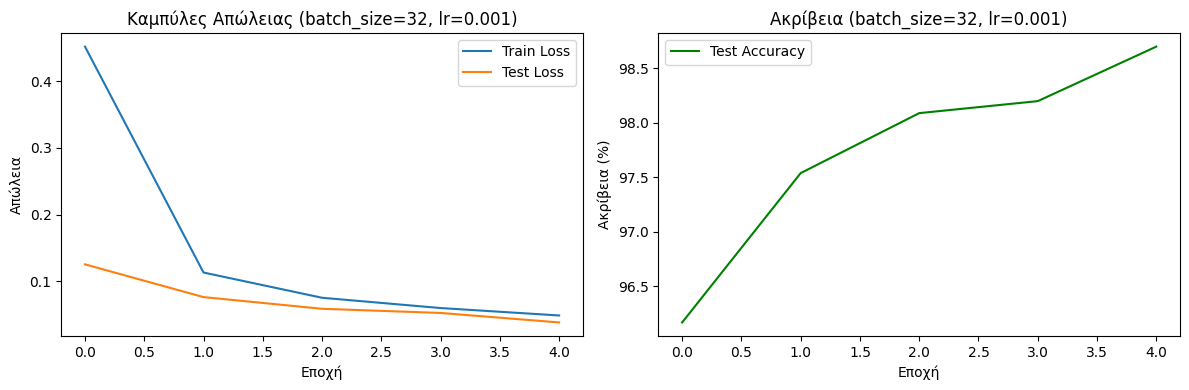

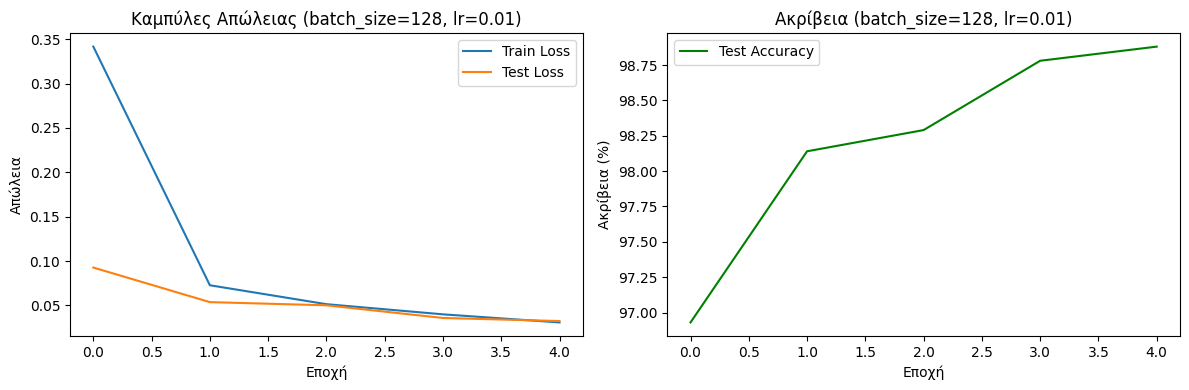

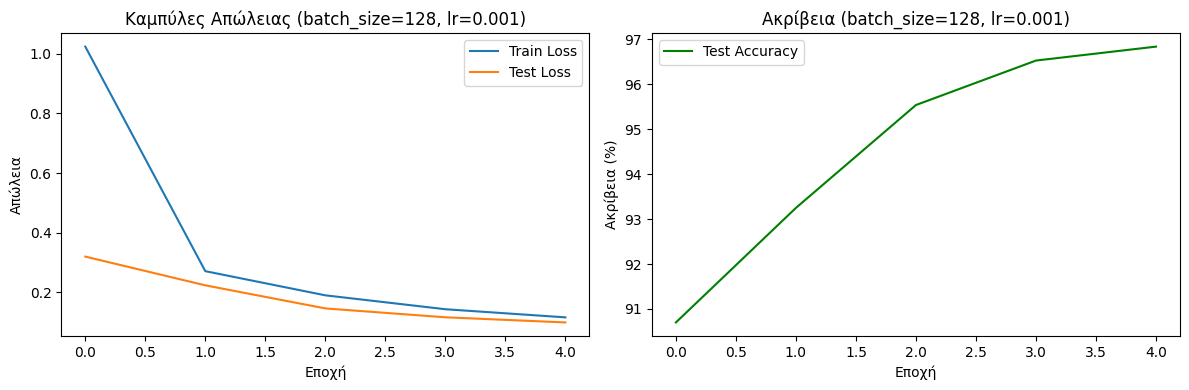

In [1]:
"""
1) Φόρτωση δεδομένων MNIST
2) Εκπαίδευση ενός μοντέλου (CNN εδώ) σε κεντροποιημένο περιβάλλον
3) Δοκιμή δύο διαφορετικών τιμών για batch_size και learning_rate
4) Εκτύπωση και σχεδίαση των καμπυλών train/test loss & test accuracy

Εκτελούμε 4 συνολικά πειράματα:
    1) batch_size=32,  learning_rate=0.01
    2) batch_size=32,  learning_rate=0.001
    3) batch_size=128, learning_rate=0.01
    4) batch_size=128, learning_rate=0.001

Μετά από κάθε πείραμα, σχεδιάζουμε:
    - Το training loss ανά εποχή
    - Το testing loss ανά εποχή
    - Το testing accuracy ανά εποχή
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# ========================
# 1. Ορισμός Μοντέλου CNN
# ========================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(32*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)           # [batch_size, 32, 7, 7]
        x = x.view(x.size(0), -1)         # μετατροπή σε μονοδιάστατο
        x = self.fc_layers(x)            # [batch_size, 10]
        return x

# =============================
# 2. Συνάρτηση Εκπαίδευσης
# =============================
def train_one_epoch(model, device, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    return avg_train_loss

# ===============================
# 3. Συνάρτηση Αξιολόγησης
# ===============================
def evaluate(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            loss = criterion(outputs, target)

            test_loss += loss.item()
            _, predicted = torch.max(outputs, dim=1)
            correct += (predicted == target).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    accuracy = 100.0 * correct / len(test_loader.dataset)
    return avg_test_loss, accuracy

# =================================
# 4. Το Κύριο Πείραμα
# =================================
def run_experiment(batch_size, learning_rate, epochs=5):
    """
    Εκτελεί ένα πείραμα με τα δοσμένα batch_size και learning_rate.
    Εκπαιδεύει για 'epochs' εποχές στο σύνολο δεδομένων MNIST (κεντροποιημένο).
    Επιστρέφει:
        (train_losses, test_losses, test_accuracies) για όλες τις εποχές
    """
    # 4.1. Προετοιμασία Συνόλου Δεδομένων & DataLoader
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset  = MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    # 4.2. Ορισμός Μοντέλου, Συνάρτησης Απώλειας, Βελτιστοποιητή
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # 4.3. Λίστες για αποθήκευση μετρικών
    train_losses = []
    test_losses = []
    test_accuracies = []

    # 4.4. Βρόχος Εκπαίδευσης
    for epoch in range(epochs):
        train_loss = train_one_epoch(model, device, train_loader, optimizer, criterion)
        val_loss, val_acc = evaluate(model, device, test_loader, criterion)

        train_losses.append(train_loss)
        test_losses.append(val_loss)
        test_accuracies.append(val_acc)

        print(f"[batch_size={batch_size}, lr={learning_rate}] "
              f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, "
              f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.2f}%")

    return train_losses, test_losses, test_accuracies

# ============================
# 5. Εκτέλεση και Σχεδίαση
# ============================
if __name__ == "__main__":
    """
    Θα εκτελέσουμε 4 ξεχωριστά πειράματα:
      1) (batch_size=32,  lr=0.01)
      2) (batch_size=32,  lr=0.001)
      3) (batch_size=128, lr=0.01)
      4) (batch_size=128, lr=0.001)

    Για κάθε πείραμα, αποθηκεύουμε αποτελέσματα και τα σχεδιάζουμε.
    """

    # Σύνολα υπερπαραμέτρων
    batch_sizes = [32, 128]
    learning_rates = [0.01, 0.001]
    epochs = 5  # μπορείτε να αλλάξετε σε περισσότερες εποχές (π.χ. 10 ή 15)

    experiment_results = {}
    exp_num = 1

    for bs in batch_sizes:
        for lr in learning_rates:
            print("\n===== Εκτέλεση Πειράματος #{}: batch_size={}, lr={} =====".format(exp_num, bs, lr))
            train_losses, test_losses, test_accuracies = run_experiment(bs, lr, epochs)
            experiment_results[(bs, lr)] = (train_losses, test_losses, test_accuracies)
            exp_num += 1

    # 5.1. Σχεδίαση αποτελεσμάτων (Train Loss, Test Loss, Test Acc) για κάθε πείραμα
    for (bs, lr), (tr_losses, te_losses, te_acc) in experiment_results.items():
        plt.figure(figsize=(12, 4))

        # (i) Καμπύλες Train Loss vs. Test Loss
        plt.subplot(1, 2, 1)
        plt.plot(tr_losses, label='Train Loss')
        plt.plot(te_losses, label='Test Loss')
        plt.title(f"Καμπύλες Απώλειας (batch_size={bs}, lr={lr})")
        plt.xlabel("Εποχή")
        plt.ylabel("Απώλεια")
        plt.legend()

        # (ii) Ακρίβεια στο Test
        plt.subplot(1, 2, 2)
        plt.plot(te_acc, label='Test Accuracy', color='green')
        plt.title(f"Ακρίβεια (batch_size={bs}, lr={lr})")
        plt.xlabel("Εποχή")
        plt.ylabel("Ακρίβεια (%)")
        plt.legend()

        plt.tight_layout()
        plt.show()

2. (Πειραματικό Ερώτημα) Στην συνέχεια, στα πλαίσια της αποκεντρωμένης μάθησης, θεωρήστε πως υπάρχουν 10 χρήστες, στους οποίους θα πρέπει να μοιράσετε τα δεδομένα με IID (identically independently distributed) τρόπο. Αυτό σημαίνει πως κάθε χρήστης θα λάβει ίδιο περίπου ποσοστό δεδομένων από όλες τις διαθέσιμες κλάσεις (patterns), καθώς επίσης και ότι όλοι οι χρήστες θα διαθέτουν ίδιο πλήθος δεδομένων.
Πραγματοποιήστε πάλι τα ζητούμενα του προηγούμενου ερωτήματος.


Using device: cuda

Εκτέλεση Ομοσπονδιακού Πειράματος #1
  batch_size=32, learning_rate=0.01,   global_rounds=5, local_epochs=1

[Round 1/5] batch_size=32, lr=0.01 | Train Loss: 0.1940, Test Loss: 0.1816, Test Acc: 94.81%
[Round 2/5] batch_size=32, lr=0.01 | Train Loss: 0.0964, Test Loss: 0.0877, Test Acc: 97.11%
[Round 3/5] batch_size=32, lr=0.01 | Train Loss: 0.0747, Test Loss: 0.0688, Test Acc: 97.75%
[Round 4/5] batch_size=32, lr=0.01 | Train Loss: 0.0582, Test Loss: 0.0536, Test Acc: 98.19%
[Round 5/5] batch_size=32, lr=0.01 | Train Loss: 0.0496, Test Loss: 0.0477, Test Acc: 98.48%

Εκτέλεση Ομοσπονδιακού Πειράματος #2
  batch_size=32, learning_rate=0.001,   global_rounds=5, local_epochs=1

[Round 1/5] batch_size=32, lr=0.001 | Train Loss: 0.7121, Test Loss: 0.6948, Test Acc: 82.18%
[Round 2/5] batch_size=32, lr=0.001 | Train Loss: 0.3624, Test Loss: 0.3464, Test Acc: 89.78%
[Round 3/5] batch_size=32, lr=0.001 | Train Loss: 0.2935, Test Loss: 0.2781, Test Acc: 91.79%
[Round 4/5] b

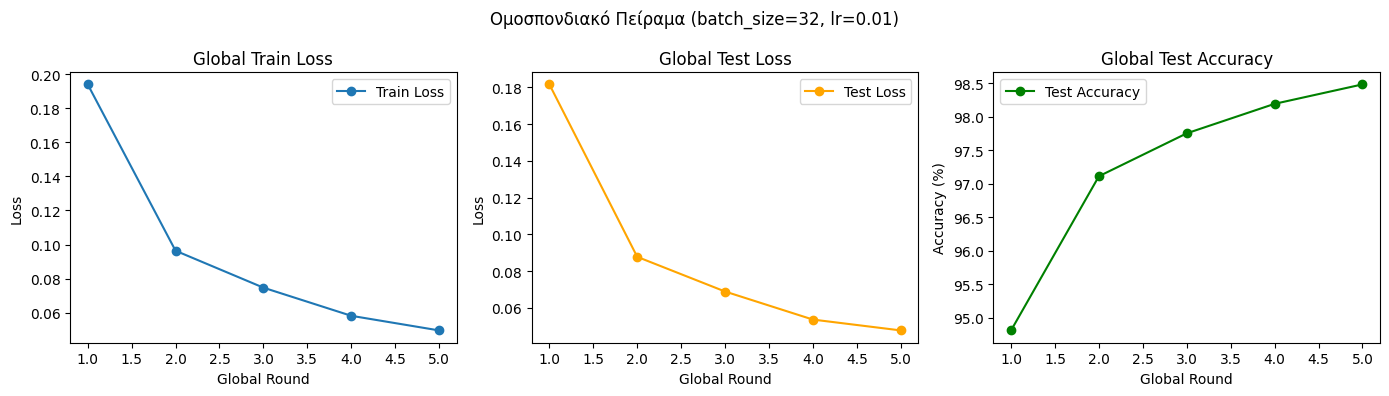

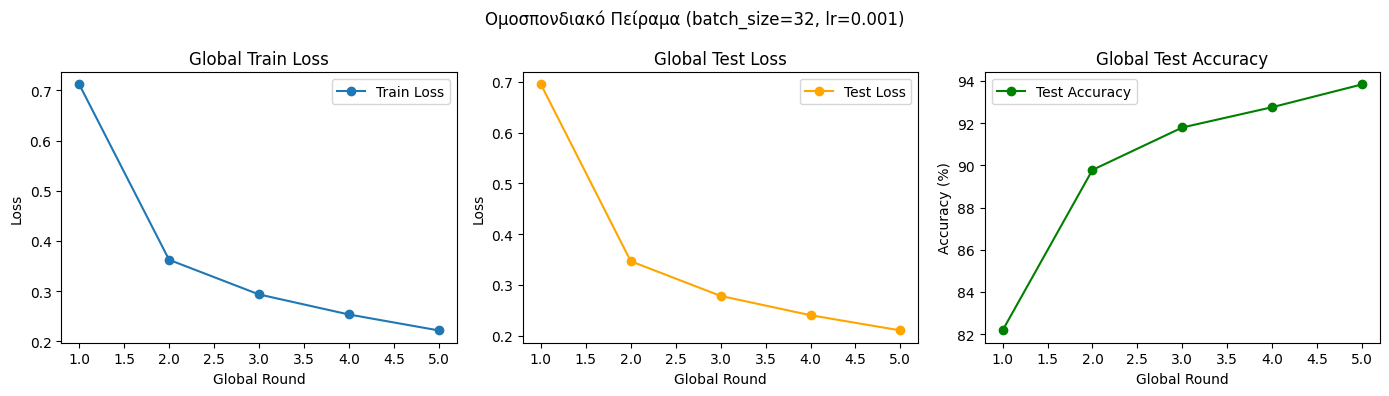

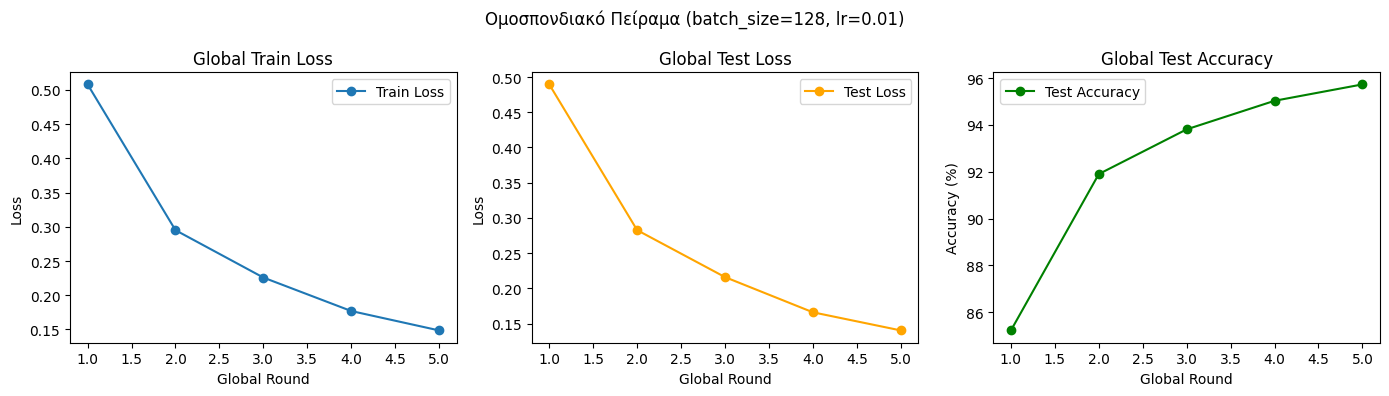

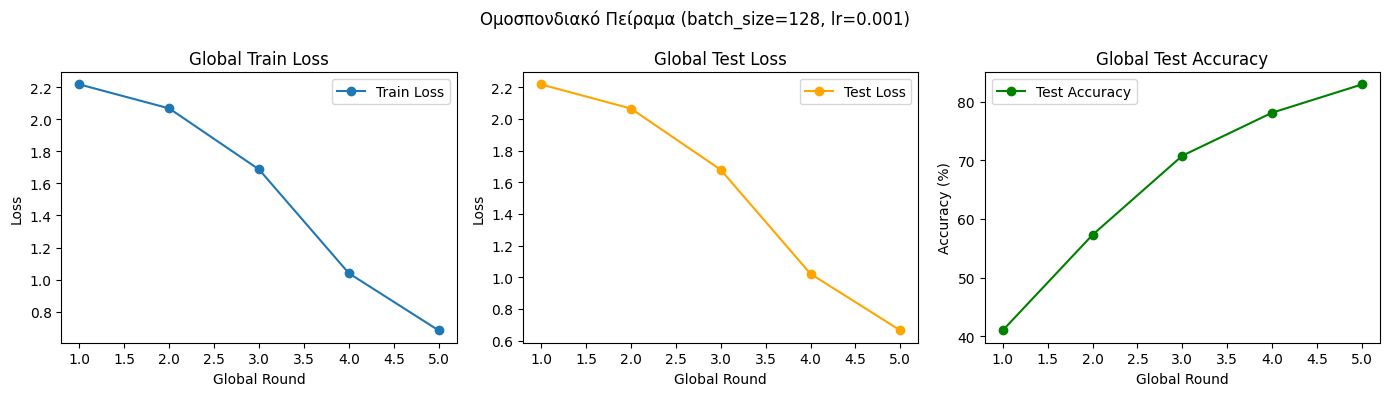

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np
import copy
import matplotlib.pyplot as plt

################################################################
# 1. Ορισμός ενός απλού CNN για MNIST
################################################################
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(32*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)  # [N, 32, 7, 7]
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)    # [N, 10]
        return x

################################################################
# 2. Συναρτήσεις τοπικής εκπαίδευσης/αξιολόγησης
################################################################
def local_train(model, train_loader, criterion, optimizer, epochs=1, device='cpu'):
    """
    Perform local training of 'model' for 'epochs' on 'train_loader'.
    """
    model.train()
    for _ in range(epochs):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

def evaluate(model, test_loader, criterion, device='cpu'):
    """
    Evaluate 'model' on 'test_loader' and return (avg_loss, accuracy).
    """
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()

            _, predicted = torch.max(output, dim=1)
            correct += (predicted == target).sum().item()
            total += target.size(0)

    avg_test_loss = test_loss / len(test_loader)
    accuracy = 100.0 * correct / total
    return avg_test_loss, accuracy

################################################################
# 3. Τεμαχισμός του συνόλου δεδομένων IID μεταξύ 'num_users' χρηστών
################################################################
def split_iid(dataset, num_users=10):
    """
    Randomly splits 'dataset' into 'num_users' IID parts of equal size.
    Each user gets ~ (len(dataset)/num_users) samples.
    """
    num_items = len(dataset) // num_users
    all_indices = np.arange(len(dataset))
    np.random.shuffle(all_indices)

    subsets = []
    for i in range(num_users):
        start_idx = i * num_items
        end_idx   = start_idx + num_items
        user_indices = all_indices[start_idx:end_idx]
        subsets.append(Subset(dataset, user_indices))

    return subsets

################################################################
# 4. Συνάρτηση FedAvg
################################################################
def fed_avg(global_model, local_models, weights=None):
    """
    Performs (weighted) FedAvg of local_models into global_model in-place.
    - local_models: list of models after local training
    - weights: list of floats that sum to 1 (e.g. proportional to #samples).
    """
    global_dict = global_model.state_dict()

    # Αρχικοποίηση συσσωρευτή στο μηδέν
    for key in global_dict.keys():
        global_dict[key] = torch.zeros_like(global_dict[key])

    # Αν δεν δόθηκαν βάρη, κάνουμε απλό μέσο όρο
    if weights is None:
        weights = [1.0 / len(local_models)] * len(local_models)

    # Συσσώρευση κάθε παραμέτρου
    for w, local_model in zip(weights, local_models):
        local_dict = local_model.state_dict()
        for key in global_dict.keys():
            global_dict[key] += w * local_dict[key]

    global_model.load_state_dict(global_dict)

################################################################
# 5. Συνάρτηση για εκτέλεση ομοσπονδιακού πειράματος
################################################################
def run_federated_experiment(batch_size, learning_rate,
                             num_users=10, global_rounds=5,
                             local_epochs=1,
                             device='cpu'):
    """
    Runs a Federated Learning experiment (FedAvg) on MNIST with:
      - 'num_users' IID users
      - 'batch_size', 'learning_rate'
      - 'global_rounds', 'local_epochs'
    Returns: (train_loss_history, test_loss_history, test_acc_history)
    """
    # 5.1 Φόρτωση MNIST
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset  = MNIST(root='./data', train=False, download=True, transform=transform)

    # 5.2 Τεμαχισμός του συνόλου εκπαίδευσης μεταξύ χρηστών (IID)
    subsets = split_iid(train_dataset, num_users=num_users)
    user_loaders = []
    local_num_samples = []

    for s in subsets:
        loader = DataLoader(s, batch_size=batch_size, shuffle=True)
        user_loaders.append(loader)
        local_num_samples.append(len(s))

    # Φορτωτής για το τεστ (παγκόσμιος)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    # 5.3 Δημιουργία του παγκόσμιου μοντέλου
    global_model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()

    # Για αποθήκευση αποτελεσμάτων
    train_loss_history = []
    test_loss_history  = []
    test_acc_history   = []

    # 5.4 Παγκόσμιοι γύροι ομοσπονδιακής εκπαίδευσης
    for round_idx in range(global_rounds):
        # Λίστα τοπικών μοντέλων μετά την εκπαίδευση
        local_models = []

        # Τοπική εκπαίδευση κάθε χρήστη
        for user_idx in range(num_users):
            # Αντιγραφή του παγκόσμιου μοντέλου
            user_model = copy.deepcopy(global_model).to(device)
            optimizer  = optim.SGD(user_model.parameters(), lr=learning_rate, momentum=0.9)

            # Τοπική εκπαίδευση
            local_train(user_model, user_loaders[user_idx], criterion, optimizer,
                        epochs=local_epochs, device=device)
            local_models.append(user_model)

        # Βαρυτομένη FedAvg
        total_samples = sum(local_num_samples)
        weights = [s / total_samples for s in local_num_samples]
        fed_avg(global_model, local_models, weights=weights)

        # Υπολογισμός train loss του παγκόσμιου μοντέλου (σε όλα τα τοπικά δεδομένα)
        global_model.eval()
        running_loss = 0.0
        total_data   = 0
        with torch.no_grad():
            for user_idx in range(num_users):
                for data, target in user_loaders[user_idx]:
                    data, target = data.to(device), target.to(device)
                    output = global_model(data)
                    loss   = criterion(output, target)
                    bsz    = data.size(0)
                    running_loss += loss.item() * bsz
                    total_data   += bsz
        avg_train_loss = running_loss / total_data if total_data>0 else 0.0

        # Αξιολόγηση στο σύνολο τεστ
        test_loss, test_acc = evaluate(global_model, test_loader, criterion, device=device)

        # Αποθήκευση
        train_loss_history.append(avg_train_loss)
        test_loss_history.append(test_loss)
        test_acc_history.append(test_acc)

        print(f"[Round {round_idx+1}/{global_rounds}] "
              f"batch_size={batch_size}, lr={learning_rate} | "
              f"Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}, "
              f"Test Acc: {test_acc:.2f}%")

    return train_loss_history, test_loss_history, test_acc_history

################################################################
# 6. Κύριο τμήμα - εκτελούμε αυτόματα 4 πειράματα
################################################################
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    # Θέλουμε 4 πειράματα:
    #   (batch_size=32, lr=0.01),
    #   (batch_size=32, lr=0.001),
    #   (batch_size=128, lr=0.01),
    #   (batch_size=128, lr=0.001).
    # Θα έχουμε για παράδειγμα global_rounds=5, local_epochs=1 για επίδειξη.
    # Μπορούμε να τα αυξήσουμε για πιο εκτεταμένη εκπαίδευση.

    exp_params = [
        (32,   0.01),
        (32,   0.001),
        (128,  0.01),
        (128,  0.001),
    ]

    global_rounds = 5
    local_epochs  = 1
    num_users     = 10

    results_dict = {}
    exp_number = 1

    for (bs, lr) in exp_params:
        print("\n==========================================")
        print(f"Εκτέλεση Ομοσπονδιακού Πειράματος #{exp_number}")
        print(f"  batch_size={bs}, learning_rate={lr}, "
              f"  global_rounds={global_rounds}, local_epochs={local_epochs}")
        print("==========================================\n")

        train_losses, test_losses, test_accs = run_federated_experiment(
            batch_size=bs,
            learning_rate=lr,
            num_users=num_users,
            global_rounds=global_rounds,
            local_epochs=local_epochs,
            device=device
        )

        results_dict[(bs, lr)] = (train_losses, test_losses, test_accs)
        exp_number += 1

    # -----------------------------------------------------------
    # 7. Σχεδίαση καμπυλών για κάθε πείραμα
    # -----------------------------------------------------------
    rounds = np.arange(1, global_rounds+1)

    for (bs, lr), (tr_losses, te_losses, te_accs) in results_dict.items():
        plt.figure(figsize=(14, 4))

        plt.suptitle(f"Ομοσπονδιακό Πείραμα (batch_size={bs}, lr={lr})")

        # (i) Απώλεια Εκπαίδευσης
        plt.subplot(1, 3, 1)
        plt.plot(rounds, tr_losses, marker='o', label='Train Loss')
        plt.xlabel('Global Round')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Global Train Loss')

        # (ii) Απώλεια Δοκιμής
        plt.subplot(1, 3, 2)
        plt.plot(rounds, te_losses, marker='o', color='orange', label='Test Loss')
        plt.xlabel('Global Round')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Global Test Loss')

        # (iii) Ακρίβεια Δοκιμής
        plt.subplot(1, 3, 3)
        plt.plot(rounds, te_accs, marker='o', color='green', label='Test Accuracy')
        plt.xlabel('Global Round')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.title('Global Test Accuracy')

        plt.tight_layout()
        plt.show()

3. (Πειραματικό Ερώτημα) Στο τέλος θα εστιάσουμε στην πιο απαιτητική πρόκληση της αποκεντρωμένης μάθησης, καθώς θα θεωρήσετε πως υπάρχουν 10 χρήστες, στους οποίους μοιράζετε τα δεδομένα με non-IID τρόπο. Αυτό σημαίνει πως κάθε χρήστης διαθέτει δεδομένα που ανήκουν αποκλειστικά σε 2 από τα 10 patterns. Πραγματοποιήστε πάλι τα ζητούμενα του πρώτου ερωτήματος.

Using device: cuda

Εκτέλεση Ομοσπονδιακού Μη-IID Πειράματος #1
  batch_size=32, learning_rate=0.01,   global_rounds=5, local_epochs=1, num_users=10

[Round 1/5] Μη-IID (2 κλάσεις/χρήστη), batch_size=32, lr=0.01 | Train Loss: 1.8967, Test Loss: 1.8942, Test Acc: 53.43%
[Round 2/5] Μη-IID (2 κλάσεις/χρήστη), batch_size=32, lr=0.01 | Train Loss: 1.1773, Test Loss: 1.1716, Test Acc: 78.29%
[Round 3/5] Μη-IID (2 κλάσεις/χρήστη), batch_size=32, lr=0.01 | Train Loss: 0.7467, Test Loss: 0.7356, Test Acc: 86.42%
[Round 4/5] Μη-IID (2 κλάσεις/χρήστη), batch_size=32, lr=0.01 | Train Loss: 0.5570, Test Loss: 0.5453, Test Acc: 85.26%
[Round 5/5] Μη-IID (2 κλάσεις/χρήστη), batch_size=32, lr=0.01 | Train Loss: 0.5006, Test Loss: 0.4900, Test Acc: 86.04%

Εκτέλεση Ομοσπονδιακού Μη-IID Πειράματος #2
  batch_size=32, learning_rate=0.001,   global_rounds=5, local_epochs=1, num_users=10

[Round 1/5] Μη-IID (2 κλάσεις/χρήστη), batch_size=32, lr=0.001 | Train Loss: 2.0542, Test Loss: 2.0455, Test Acc: 39.2

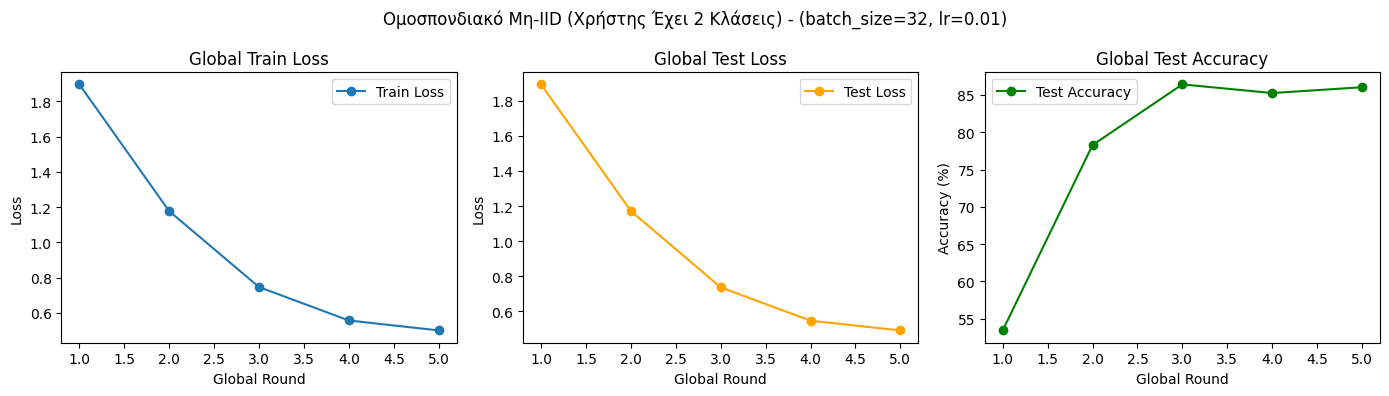

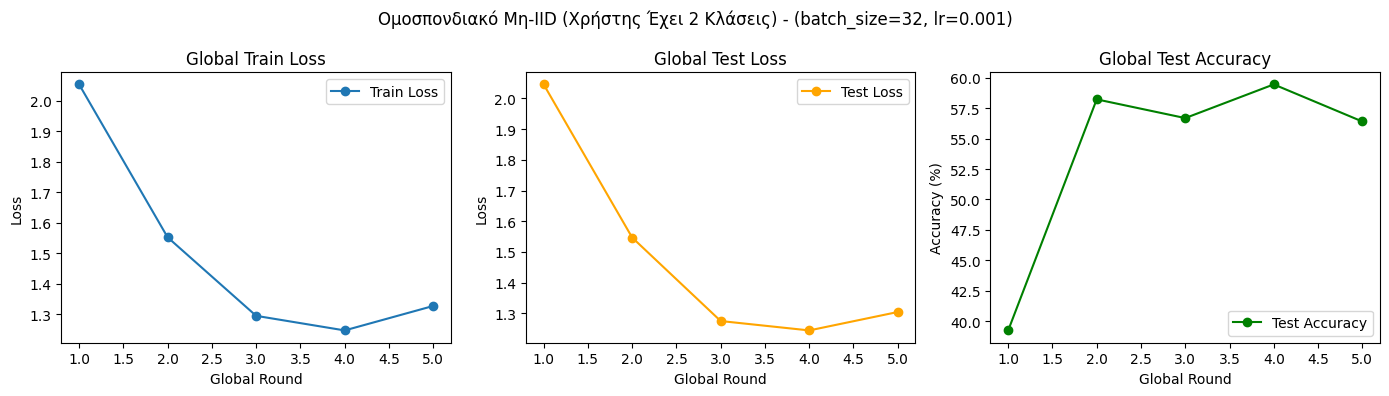

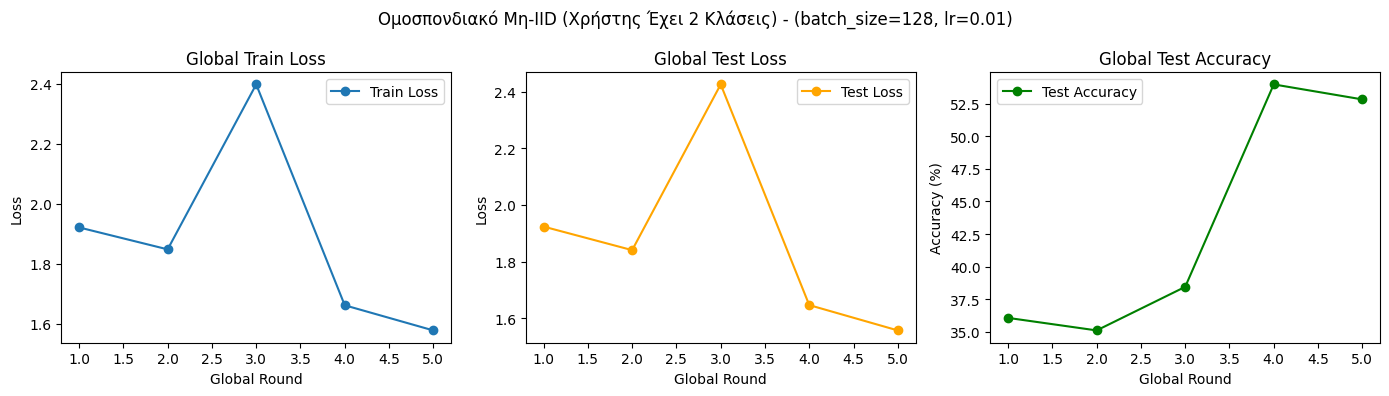

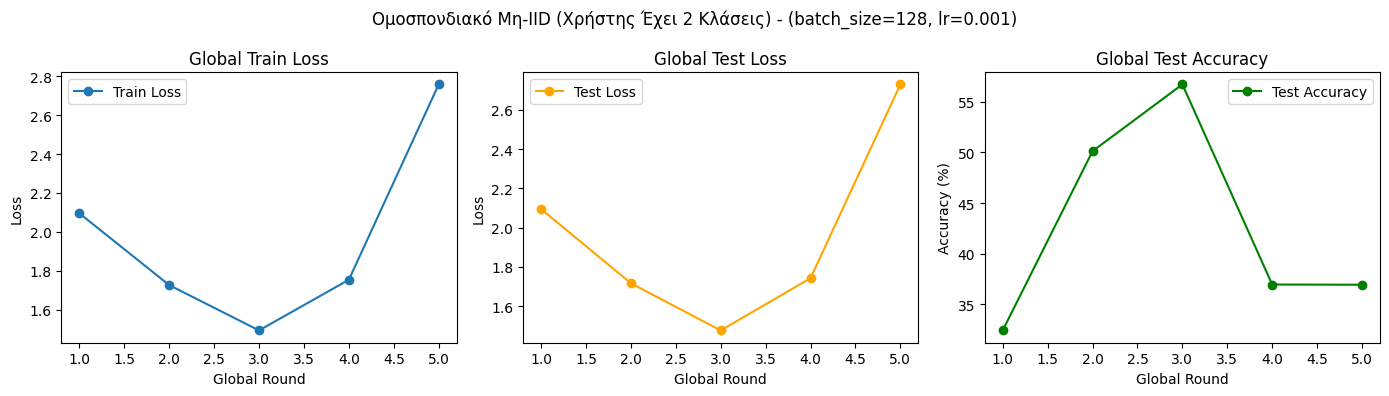

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np
import copy
import matplotlib.pyplot as plt

################################################################
# 1. Ορισμός ενός απλού μοντέλου CNN για MNIST
################################################################
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(32*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)  # [N, 32, 7, 7]
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)    # [N, 10]
        return x

################################################################
# 2. Τοπικές συναρτήσεις εκπαίδευσης / αξιολόγησης
################################################################
def local_train(model, train_loader, criterion, optimizer, epochs=1, device='cpu'):
    """
    Εκτελεί τοπική εκπαίδευση του 'model' για 'epochs' χρησιμοποιώντας το 'train_loader'.
    """
    model.train()
    for _ in range(epochs):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

def evaluate(model, test_loader, criterion, device='cpu'):
    """
    Αξιολογεί το 'model' στο 'test_loader' και επιστρέφει (avg_loss, accuracy).
    """
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()

            _, predicted = torch.max(output, dim=1)
            correct += (predicted == target).sum().item()
            total += target.size(0)

    avg_test_loss = test_loss / len(test_loader)
    accuracy = 100.0 * correct / total
    return avg_test_loss, accuracy

################################################################
# 3. Μη-IID κατανομή: κάθε χρήστης παίρνει ακριβώς 2 κλάσεις
################################################################
def split_non_iid(dataset, num_users=10):
    """
    Υποθέτουμε 10 κλάσεις στο MNIST (ψηφία 0..9) και 10 χρήστες.
    Κάθε χρήστης παίρνει ακριβώς 2 κλάσεις, με ζευγάρια που επαναλαμβάνονται για να καλύψουμε τους 10 χρήστες.
    pairs_of_classes = [[0,1], [0,1], [2,3], [2,3], [4,5], [4,5], [6,7], [6,7], [8,9], [8,9]]

    Για κάθε ζευγάρι, μαζεύουμε όλα τα δείγματα από αυτές τις 2 κλάσεις από το 'dataset'.
    Επιστρέφει λίστα από 10 Subsets, ένα για κάθε χρήστη.
    """
    pairs_of_classes = [
        [0,1], [0,1],
        [2,3], [2,3],
        [4,5], [4,5],
        [6,7], [6,7],
        [8,9], [8,9]
    ]
    subsets = []

    targets = np.array(dataset.targets)
    for pair in pairs_of_classes:
        c1, c2 = pair
        idx = np.where((targets == c1) | (targets == c2))[0]
        subset = Subset(dataset, idx)
        subsets.append(subset)

    return subsets

################################################################
# 4. Συνάρτηση FedAvg
################################################################
def fed_avg(global_model, local_models, weights=None):
    """
    Εκτελεί (weighted) FedAvg των local_models στο global_model επί τόπου.
    - local_models: λίστα από μοντέλα μετά από τοπική εκπαίδευση
    - weights: λίστα με αριθμούς που αθροίζουν στο 1 (π.χ. ανάλογοι του αριθμού δειγμάτων).
    """
    global_dict = global_model.state_dict()

    # Αρχικοποίηση συσσωρευτή στο μηδέν
    for key in global_dict.keys():
        global_dict[key] = torch.zeros_like(global_dict[key])

    # Αν δεν δοθούν βάρη, κάνουμε απλό μέσο όρο
    if weights is None:
        weights = [1.0 / len(local_models)] * len(local_models)

    # Συσσώρευση κάθε παραμέτρου
    for w, local_model in zip(weights, local_models):
        local_dict = local_model.state_dict()
        for key in global_dict.keys():
            global_dict[key] += w * local_dict[key]

    global_model.load_state_dict(global_dict)

################################################################
# 5. Ομοσπονδιακό πείραμα (μη-IID, κάθε χρήστης έχει 2 κλάσεις)
################################################################
def run_federated_experiment_non_iid(batch_size, learning_rate,
                                     num_users=10, global_rounds=5,
                                     local_epochs=1,
                                     device='cpu'):
    """
    Εκτελεί ένα πείραμα Ομοσπονδιακής Μάθησης στο MNIST με μη-IID δεδομένα:
      - 'num_users' = 10, κάθε χρήστης έχει δεδομένα από ακριβώς 2 κλάσεις.
      - 'batch_size', 'learning_rate'
      - 'global_rounds', 'local_epochs'
    Επιστρέφει: (train_loss_history, test_loss_history, test_acc_history)
    """
    # 5.1 Φόρτωση MNIST
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset  = MNIST(root='./data', train=False, download=True, transform=transform)

    # 5.2 Διαμοιρασμός του train set σε χρήστες (μη-IID, 2 κλάσεις ανά χρήστη)
    subsets = split_non_iid(train_dataset, num_users=num_users)
    user_loaders = []
    local_num_samples = []

    for s in subsets:
        loader = DataLoader(s, batch_size=batch_size, shuffle=True)
        user_loaders.append(loader)
        local_num_samples.append(len(s))

    # Φορτωτής δοκιμής (παγκόσμιος)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    # 5.3 Δημιουργία του παγκόσμιου μοντέλου
    global_model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()

    # Για αποθήκευση των αποτελεσμάτων
    train_loss_history = []
    test_loss_history  = []
    test_acc_history   = []

    # 5.4 Γύροι Ομοσπονδιακής Εκπαίδευσης
    for round_idx in range(global_rounds):
        local_models = []

        # Τοπική εκπαίδευση για κάθε χρήστη
        for user_idx in range(num_users):
            user_model = copy.deepcopy(global_model).to(device)
            optimizer  = optim.SGD(user_model.parameters(), lr=learning_rate, momentum=0.9)

            local_train(user_model, user_loaders[user_idx], criterion, optimizer,
                        epochs=local_epochs, device=device)
            local_models.append(user_model)

        # Weighted FedAvg
        total_samples = sum(local_num_samples)
        weights = [s / total_samples for s in local_num_samples]
        fed_avg(global_model, local_models, weights=weights)

        # Υπολογισμός train loss του παγκόσμιου μοντέλου (σε όλα τα τοπικά δεδομένα)
        global_model.eval()
        running_loss = 0.0
        total_data   = 0
        with torch.no_grad():
            for user_idx in range(num_users):
                for data, target in user_loaders[user_idx]:
                    data, target = data.to(device), target.to(device)
                    output = global_model(data)
                    loss   = criterion(output, target)
                    bsz    = data.size(0)
                    running_loss += loss.item() * bsz
                    total_data   += bsz
        avg_train_loss = running_loss / total_data if total_data>0 else 0.0

        # Αξιολόγηση στο σύνολο τεστ
        test_loss, test_acc = evaluate(global_model, test_loader, criterion, device=device)

        # Καταγραφή
        train_loss_history.append(avg_train_loss)
        test_loss_history.append(test_loss)
        test_acc_history.append(test_acc)

        print(f"[Round {round_idx+1}/{global_rounds}] "
              f"Μη-IID (2 κλάσεις/χρήστη), batch_size={batch_size}, lr={learning_rate} | "
              f"Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}, "
              f"Test Acc: {test_acc:.2f}%")

    return train_loss_history, test_loss_history, test_acc_history

################################################################
# 6. Κύριο τμήμα - εκτελούμε αυτόματα 4 πειράματα (όπως Q1)
################################################################
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    # Εκτελούμε τις ίδιες 4 συνδυαστικές υπερπαραμέτρων όπως πριν:
    #   (batch_size=32, lr=0.01),
    #   (batch_size=32, lr=0.001),
    #   (batch_size=128, lr=0.01),
    #   (batch_size=128, lr=0.001).
    # Θα ορίσουμε π.χ. global_rounds=5, local_epochs=1 για επίδειξη.
    # Μπορείτε να τα αυξήσετε για πιο εκτεταμένη εκπαίδευση.

    exp_params = [
        (32,   0.01),
        (32,   0.001),
        (128,  0.01),
        (128,  0.001),
    ]

    global_rounds = 5
    local_epochs  = 1
    num_users     = 10

    results_dict = {}
    exp_number = 1

    for (bs, lr) in exp_params:
        print("\n==========================================")
        print(f"Εκτέλεση Ομοσπονδιακού Μη-IID Πειράματος #{exp_number}")
        print(f"  batch_size={bs}, learning_rate={lr}, "
              f"  global_rounds={global_rounds}, local_epochs={local_epochs}, num_users={num_users}")
        print("==========================================\n")

        train_losses, test_losses, test_accs = run_federated_experiment_non_iid(
            batch_size=bs,
            learning_rate=lr,
            num_users=num_users,
            global_rounds=global_rounds,
            local_epochs=local_epochs,
            device=device
        )

        results_dict[(bs, lr)] = (train_losses, test_losses, test_accs)
        exp_number += 1

    # -----------------------------------------------------------
    # 7. Σχεδίαση καμπυλών για κάθε πείραμα
    # -----------------------------------------------------------
    rounds = np.arange(1, global_rounds+1)

    for (bs, lr), (tr_losses, te_losses, te_accs) in results_dict.items():
        plt.figure(figsize=(14, 4))
        plt.suptitle(f"Ομοσπονδιακό Μη-IID (Χρήστης Έχει 2 Κλάσεις) - (batch_size={bs}, lr={lr})")

        # (i) Train Loss
        plt.subplot(1, 3, 1)
        plt.plot(rounds, tr_losses, marker='o', label='Train Loss')
        plt.xlabel('Global Round')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Global Train Loss')

        # (ii) Test Loss
        plt.subplot(1, 3, 2)
        plt.plot(rounds, te_losses, marker='o', color='orange', label='Test Loss')
        plt.xlabel('Global Round')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Global Test Loss')

        # (iii) Test Accuracy
        plt.subplot(1, 3, 3)
        plt.plot(rounds, te_accs, marker='o', color='green', label='Test Accuracy')
        plt.xlabel('Global Round')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.title('Global Test Accuracy')

        plt.tight_layout()
        plt.show()